Robert Johansson

Source code listings for [Numerical Python - Scientific Computing and Data Science Applications with Numpy, SciPy and Matplotlib](https://link.springer.com/book/10.1007/979-8-8688-0413-7) (ISBN 979-8-8688-0412-0).

In [1]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rcParams["mathtext.fontset"] = "stix"
mpl.rcParams["font.family"] = "serif"
mpl.rcParams["font.sans-serif"] = "stix"

In [2]:
import numpy as np

In [3]:
import sympy

## Integral

In [4]:
x, x0 = sympy.symbols("x, x_0")

In [5]:
f = (x + 0.5) ** 3 - 3.5 * (x + 0.5) ** 2 + x + 3

In [6]:
f.subs(x, x0) + f.diff(x).subs(x, x0) * (x - x0)

x_0 + (x - x_0)*(-7.0*x_0 + 3*(x_0 + 0.5)**2 - 2.5) + (x_0 + 0.5)**3 - 3.5*(x_0 + 0.5)**2 + 3

In [7]:
f_func = sympy.lambdify(x, f, "numpy")

In [8]:
def arrowify(fig, ax):
    xmin, xmax = ax.get_xlim()
    ymin, ymax = ax.get_ylim()

    # removing the default axis on all sides:
    for side in ["bottom", "right", "top", "left"]:
        ax.spines[side].set_visible(False)

    # removing the axis labels and ticks
    ax.set_xticks([])
    ax.set_yticks([])
    ax.xaxis.set_ticks_position("none")
    ax.yaxis.set_ticks_position("none")

    # wider figure for demonstration
    # fig.set_size_inches(4,2.2)

    # get width and height of axes object to compute
    # matching arrowhead length and width
    dps = fig.dpi_scale_trans.inverted()
    bbox = ax.get_window_extent().transformed(dps)
    width, height = bbox.width, bbox.height

    # manual arrowhead width and length
    hw = 1.0 / 25.0 * (ymax - ymin)
    hl = 1.0 / 25.0 * (xmax - xmin)
    lw = 0.5  # axis line width
    ohg = 0.3  # arrow overhang

    # compute matching arrowhead length and width
    yhw = hw / (ymax - ymin) * (xmax - xmin) * height / width
    yhl = hl / (xmax - xmin) * (ymax - ymin) * width / height

    # draw x and y axis
    ax.arrow(
        xmin,
        0,
        xmax - xmin,
        0.0,
        fc="k",
        ec="k",
        lw=lw,
        head_width=hw,
        head_length=hl,
        overhang=ohg,
        length_includes_head=True,
        clip_on=False,
    )

    ax.arrow(
        0,
        ymin,
        0.0,
        ymax - ymin,
        fc="k",
        ec="k",
        lw=lw,
        head_width=yhw,
        head_length=yhl,
        overhang=ohg,
        length_includes_head=True,
        clip_on=False,
    )

    ax.text(xmax * 0.95, ymin * 0.25, r"$x$", fontsize=22)
    ax.text(xmin * 0.35, ymax * 0.9, r"$f(x)$", fontsize=22)

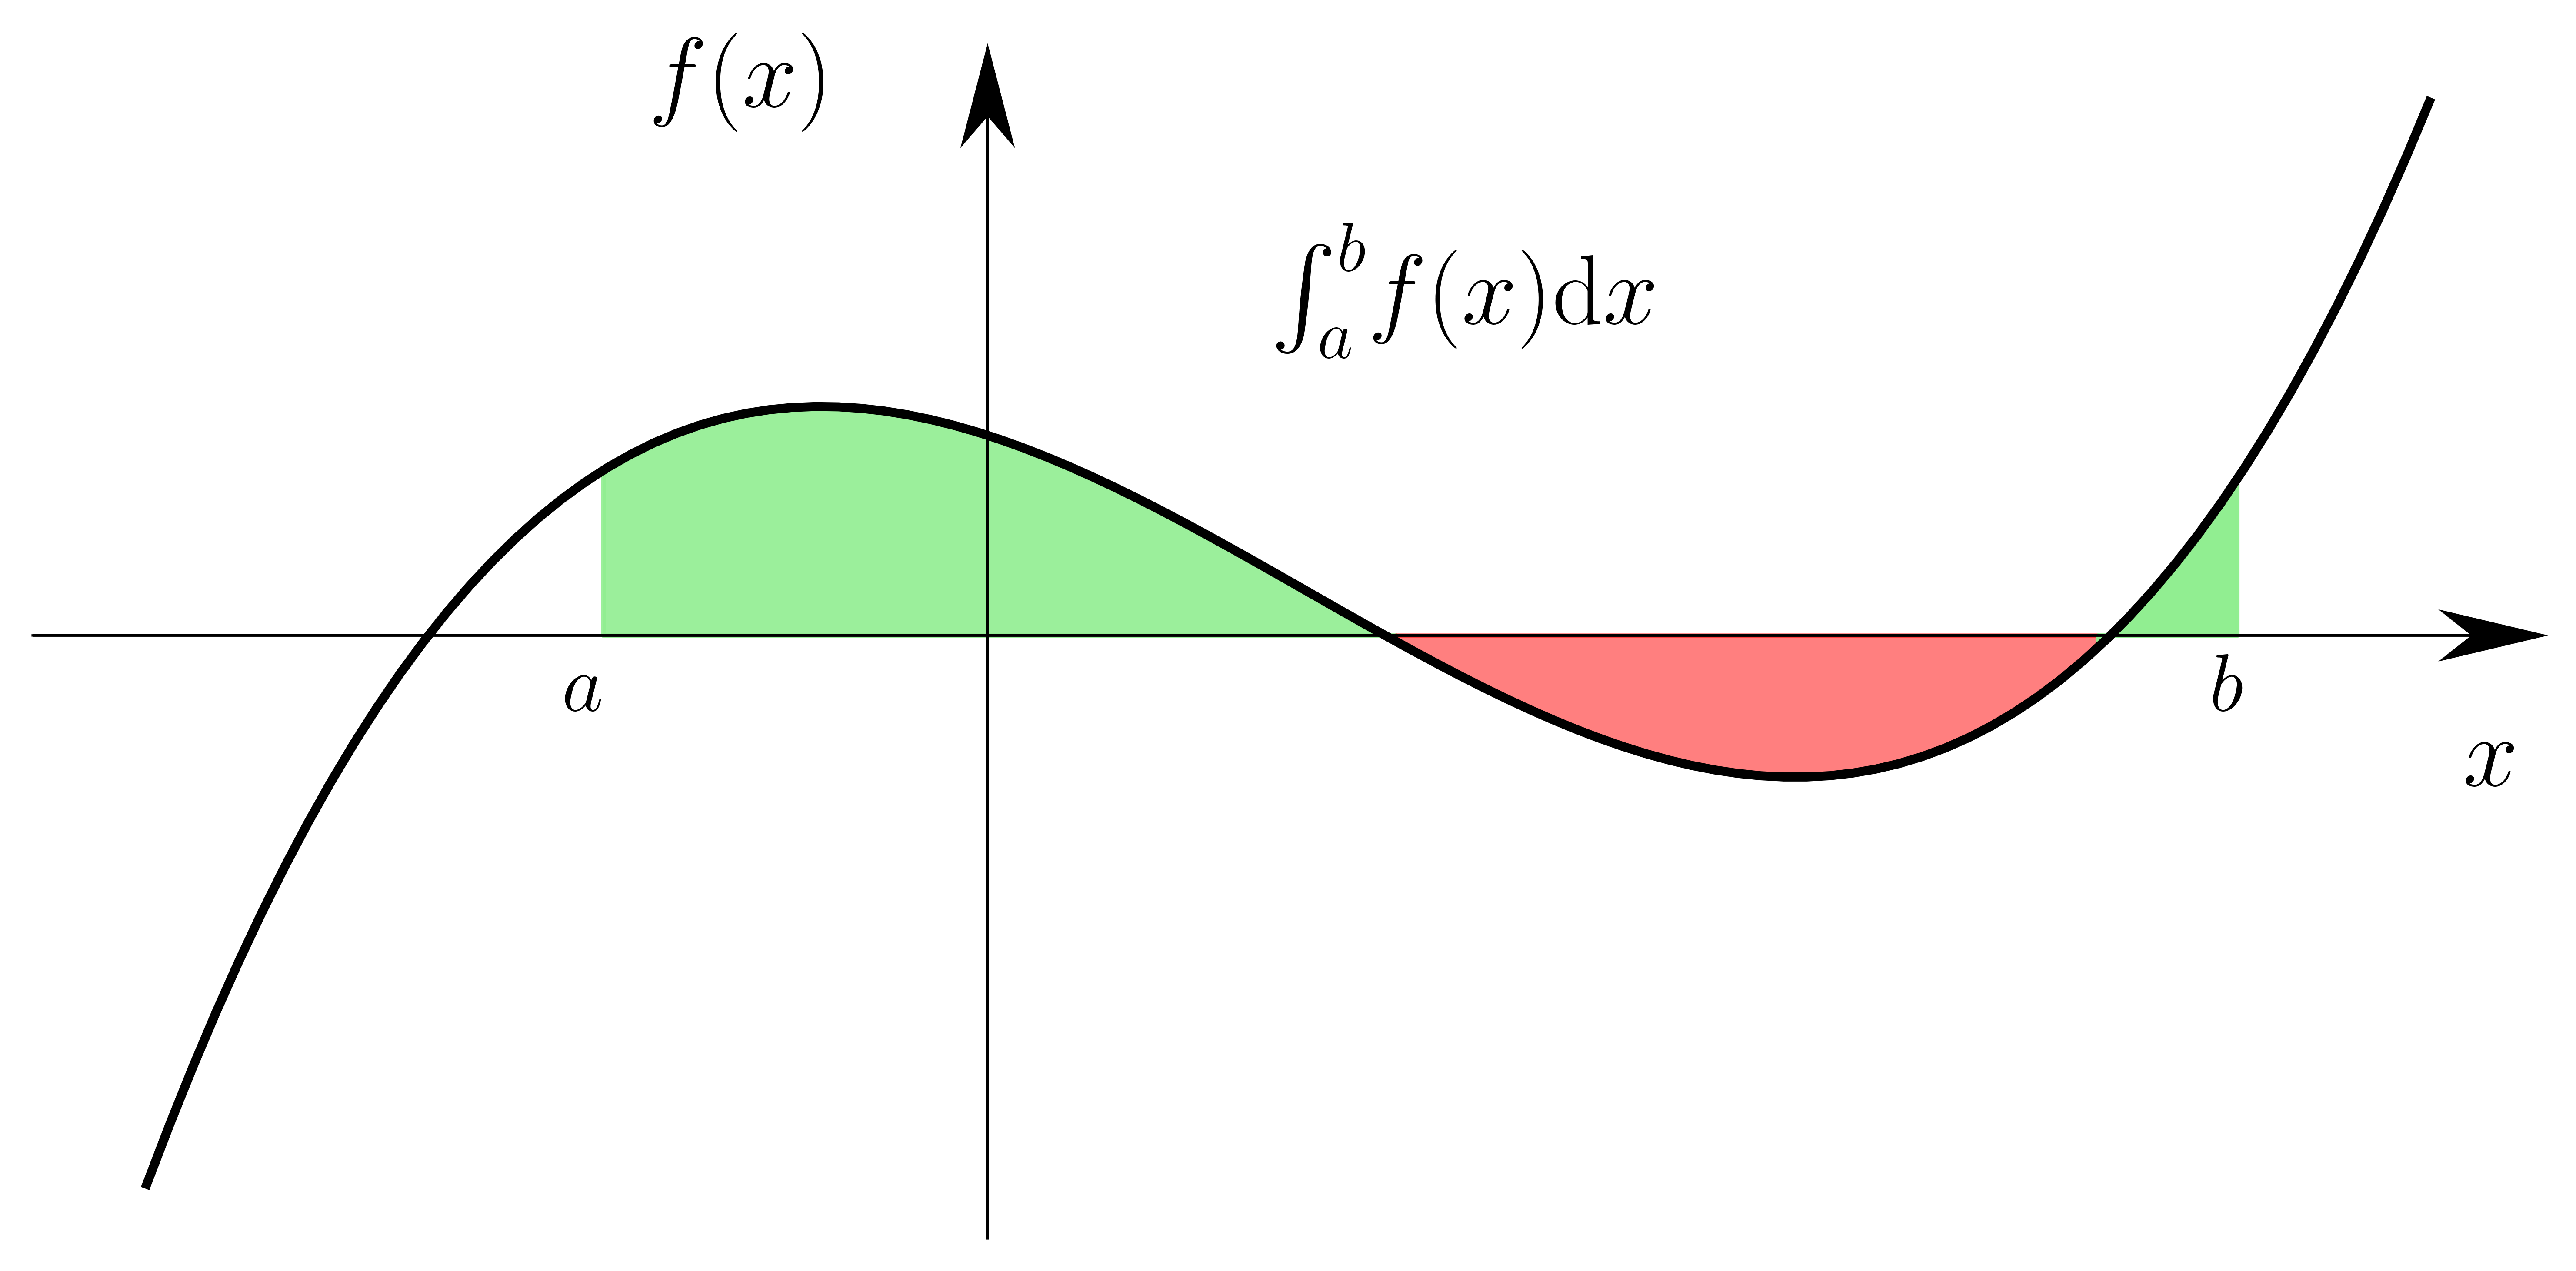

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))

xvec = np.linspace(-1.75, 3.0, 100)
ax.plot(xvec, f_func(xvec), "k", lw=2)

xvec = np.linspace(-0.8, 0.85, 100)
ax.fill_between(xvec, f_func(xvec), color="lightgreen", alpha=0.9)
xvec = np.linspace(0.85, 2.31, 100)
ax.fill_between(xvec, f_func(xvec), color="red", alpha=0.5)
xvec = np.linspace(2.31, 2.6, 100)
ax.fill_between(xvec, f_func(xvec), color="lightgreen", alpha=0.99)

ax.text(0.6, 3.5, r"$\int_a^b\!f(x){\rm d}x$", fontsize=22)
ax.text(-0.88, -0.85, r"$a$", fontsize=18)
ax.text(2.55, -0.85, r"$b$", fontsize=18)
ax.axis("tight")

arrowify(fig, ax)
fig.savefig("ch8-illustration-integral.pdf")

## Quadrature rules

In [10]:
from numpy import polynomial

In [11]:
from scipy import integrate

In [12]:
from scipy import interpolate

In [13]:
a = 0
b = 1.0


def f(x):
    return np.exp(-(x**2))

In [14]:
a = -1.0
b = 1.0


def f(x):
    return 3 + x + x**2 + x**3 + x**4

In [15]:
x = np.linspace(a, b, 100)
xx = np.linspace(a - 0.2, b + 0.2, 100)

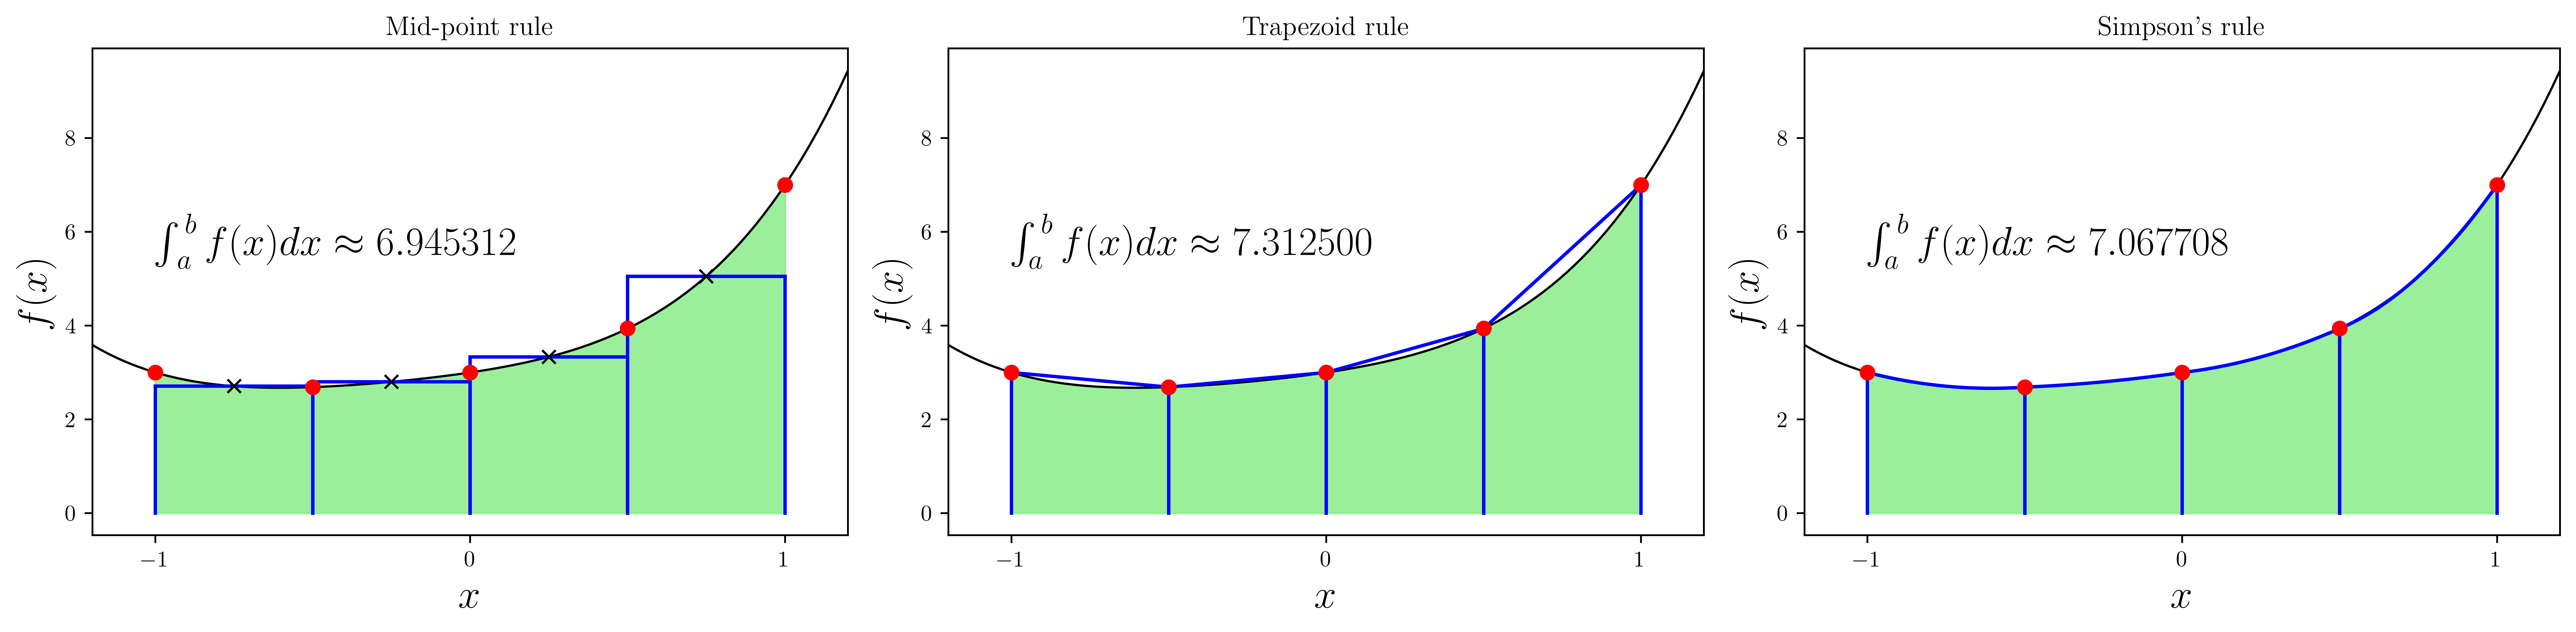

In [16]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16, 4))

npoints = 2
npoints = 5

X = np.linspace(a, b, npoints)

ax1.plot(xx, f(xx), lw=1, color="k")
ax1.fill_between(x, f(x), color="lightgreen", alpha=0.9)

i = 0  # (b-a)*f_mid
for n in range(len(X) - 1):
    f_mid = f(X[n : n + 2].mean())
    ax1.plot([X[n], X[n]], [0, f_mid], "b")
    ax1.plot([X[n + 1], X[n + 1]], [0, f_mid], "b")
    ax1.plot(X[n : n + 2], [f_mid] * 2, "b")
    ax1.plot(X[n : n + 2].mean(), f_mid, "xk")

    i += (X[n + 1] - X[n]) * f_mid

# i = (b-a)*f_mid
ax1.text(-1, 5.5, r"$\int_{\,a}^{\,b} f(x)dx \approx %f$" % i, fontsize=18)
ax1.plot(X, f(X), "ro")
ax1.set_xlim(xx.min(), xx.max())
ax1.set_title("Mid-point rule")
ax1.set_xticks([-1, 0, 1])
ax1.set_xlabel(r"$x$", fontsize=18)
ax1.set_ylabel(r"$f(x)$", fontsize=18)

names = ["Trapezoid rule", "Simpson's rule"]
for idx, ax in enumerate([ax2, ax3]):
    ax.plot(xx, f(xx), lw=1, color="k")
    ax.fill_between(x, f(x), color="lightgreen", alpha=0.9)

    i = 0
    for n in range(len(X) - 1):
        XX = np.linspace(X[n], X[n + 1], idx + 2)

        f_interp = polynomial.Polynomial.fit(XX, f(XX), len(XX) - 1)
        ax.plot([X[n], X[n]], [0, f(X[n])], "b")
        ax.plot([X[n + 1], X[n + 1]], [0, f(X[n + 1])], "b")
        XXX = np.linspace(X[n], X[n + 1], 50)
        ax.plot(XXX, f_interp(XXX), "b")

        F = f_interp.integ()
        i += F(X[n + 1]) - F(X[n])
    ax.text(-1, 5.5, r"$\int_a^{\,b} f(x)dx \approx %f$" % i, fontsize=18)
    ax.plot(X, f(X), "ro")
    ax.set_xlabel(r"$x$", fontsize=18)
    ax.set_ylabel(r"$f(x)$", fontsize=18)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_title(names[idx])
    ax.set_xticks([-1, 0, 1])

fig.tight_layout()
fig.savefig("ch8-quadrature-rules-%d.pdf" % npoints)

In [17]:
fig, ((ax1_2, ax2_2, ax3_2), (ax1_5, ax2_5, ax3_5)) = plt.subplots(
    2, 3, figsize=(16, 8), sharex=True
)

ax1, ax2, ax3 = ax1_2, ax2_2, ax3_2
npoints = 2

X = np.linspace(a, b, npoints)

ax1.plot(xx, f(xx), lw=1, color="k")
ax1.fill_between(x, f(x), color="lightgreen", alpha=0.9)

i = 0  # (b-a)*f_mid
for n in range(len(X) - 1):
    f_mid = f(X[n : n + 2].mean())
    ax1.plot([X[n], X[n]], [0, f_mid], "b")
    ax1.plot([X[n + 1], X[n + 1]], [0, f_mid], "b")
    ax1.plot(X[n : n + 2], [f_mid] * 2, "b")
    ax1.plot(X[n : n + 2].mean(), f_mid, "xk")

    i += (X[n + 1] - X[n]) * f_mid

# i = (b-a)*f_mid
ax1.text(-1, 5.5, r"$\int_{\,a}^{\,b} f(x)dx \approx %f$" % i, fontsize=18)
ax1.plot(X, f(X), "ro")
ax1.set_xlim(xx.min(), xx.max())
ax1.set_title("Mid-point rule")
ax1.set_xticks([-1, 0, 1])
ax1.set_xlabel(r"$x$", fontsize=18)
ax1.set_ylabel(r"$f(x)$", fontsize=18)

names = ["Trapezoid rule", "Simpson's rule"]
for idx, ax in enumerate([ax2, ax3]):
    ax.plot(xx, f(xx), lw=1, color="k")
    ax.fill_between(x, f(x), color="lightgreen", alpha=0.9)

    i = 0
    for n in range(len(X) - 1):
        XX = np.linspace(X[n], X[n + 1], idx + 2)

        f_interp = polynomial.Polynomial.fit(XX, f(XX), len(XX) - 1)
        ax.plot([X[n], X[n]], [0, f(X[n])], "b")
        ax.plot([X[n + 1], X[n + 1]], [0, f(X[n + 1])], "b")
        XXX = np.linspace(X[n], X[n + 1], 50)
        ax.plot(XXX, f_interp(XXX), "b")

        F = f_interp.integ()
        i += F(X[n + 1]) - F(X[n])
    ax.text(-1, 5.5, r"$\int_a^{\,b} f(x)dx \approx %f$" % i, fontsize=18)
    ax.plot(X, f(X), "ro")
    ax.set_xlabel(r"$x$", fontsize=18)
    ax.set_ylabel(r"$f(x)$", fontsize=18)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_title(names[idx])
    ax.set_xticks([-1, 0, 1])


####
ax1, ax2, ax3 = ax1_5, ax2_5, ax3_5
npoints = 2
npoints = 5


X = np.linspace(a, b, npoints)

ax1.plot(xx, f(xx), lw=1, color="k")
ax1.fill_between(x, f(x), color="lightgreen", alpha=0.9)

i = 0  # (b-a)*f_mid
for n in range(len(X) - 1):
    f_mid = f(X[n : n + 2].mean())
    ax1.plot([X[n], X[n]], [0, f_mid], "b")
    ax1.plot([X[n + 1], X[n + 1]], [0, f_mid], "b")
    ax1.plot(X[n : n + 2], [f_mid] * 2, "b")
    ax1.plot(X[n : n + 2].mean(), f_mid, "xk")

    i += (X[n + 1] - X[n]) * f_mid

# i = (b-a)*f_mid
ax1.text(-1, 5.5, r"$\int_{\,a}^{\,b} f(x)dx \approx %f$" % i, fontsize=18)
ax1.plot(X, f(X), "ro")
ax1.set_xlim(xx.min(), xx.max())
# ax1.set_title('Mid-point rule')
ax1.set_xticks([-1, 0, 1])
ax1.set_xlabel(r"$x$", fontsize=18)
ax1.set_ylabel(r"$f(x)$", fontsize=18)

names = ["Trapezoid rule", "Simpson's rule"]
for idx, ax in enumerate([ax2, ax3]):
    ax.plot(xx, f(xx), lw=1, color="k")
    ax.fill_between(x, f(x), color="lightgreen", alpha=0.9)

    i = 0
    for n in range(len(X) - 1):
        XX = np.linspace(X[n], X[n + 1], idx + 2)

        f_interp = polynomial.Polynomial.fit(XX, f(XX), len(XX) - 1)
        ax.plot([X[n], X[n]], [0, f(X[n])], "b")
        ax.plot([X[n + 1], X[n + 1]], [0, f(X[n + 1])], "b")
        XXX = np.linspace(X[n], X[n + 1], 50)
        ax.plot(XXX, f_interp(XXX), "b")

        F = f_interp.integ()
        i += F(X[n + 1]) - F(X[n])
    ax.text(-1, 5.5, r"$\int_a^{\,b} f(x)dx \approx %f$" % i, fontsize=18)
    ax.plot(X, f(X), "ro")
    ax.set_xlabel(r"$x$", fontsize=18)
    ax.set_ylabel(r"$f(x)$", fontsize=18)
    ax.set_xlim(xx.min(), xx.max())
    # ax.set_title(names[idx])
    ax.set_xticks([-1, 0, 1])

fig.tight_layout()
fig.savefig("ch8-quadrature-rules-%d.pdf" % npoints)

In [18]:
# mid-point rule
(b - a) * f((b + a) / 2.0)

6.0

In [19]:
# trapezoid rule
(b - a) / 2.0 * (f(a) + f(b))

10.0

In [20]:
# simpsons rule
(b - a) / 6.0 * (f(a) + 4 * f((a + b) / 2.0) + f(b))

7.333333333333333

In [21]:
# exact result
integrate.quad(f, a, b)[0]

7.066666666666667

In [22]:
integrate.trapezoid(f(X), X)

np.float64(7.3125)

In [23]:
integrate.simpson(f(X), X)

np.float64(7.083333333333332)

In [24]:
integrate.quad(f, a, b)[0]

7.066666666666667

In [25]:
integrate.newton_cotes(2)[0]

array([0.33333333, 1.33333333, 0.33333333])

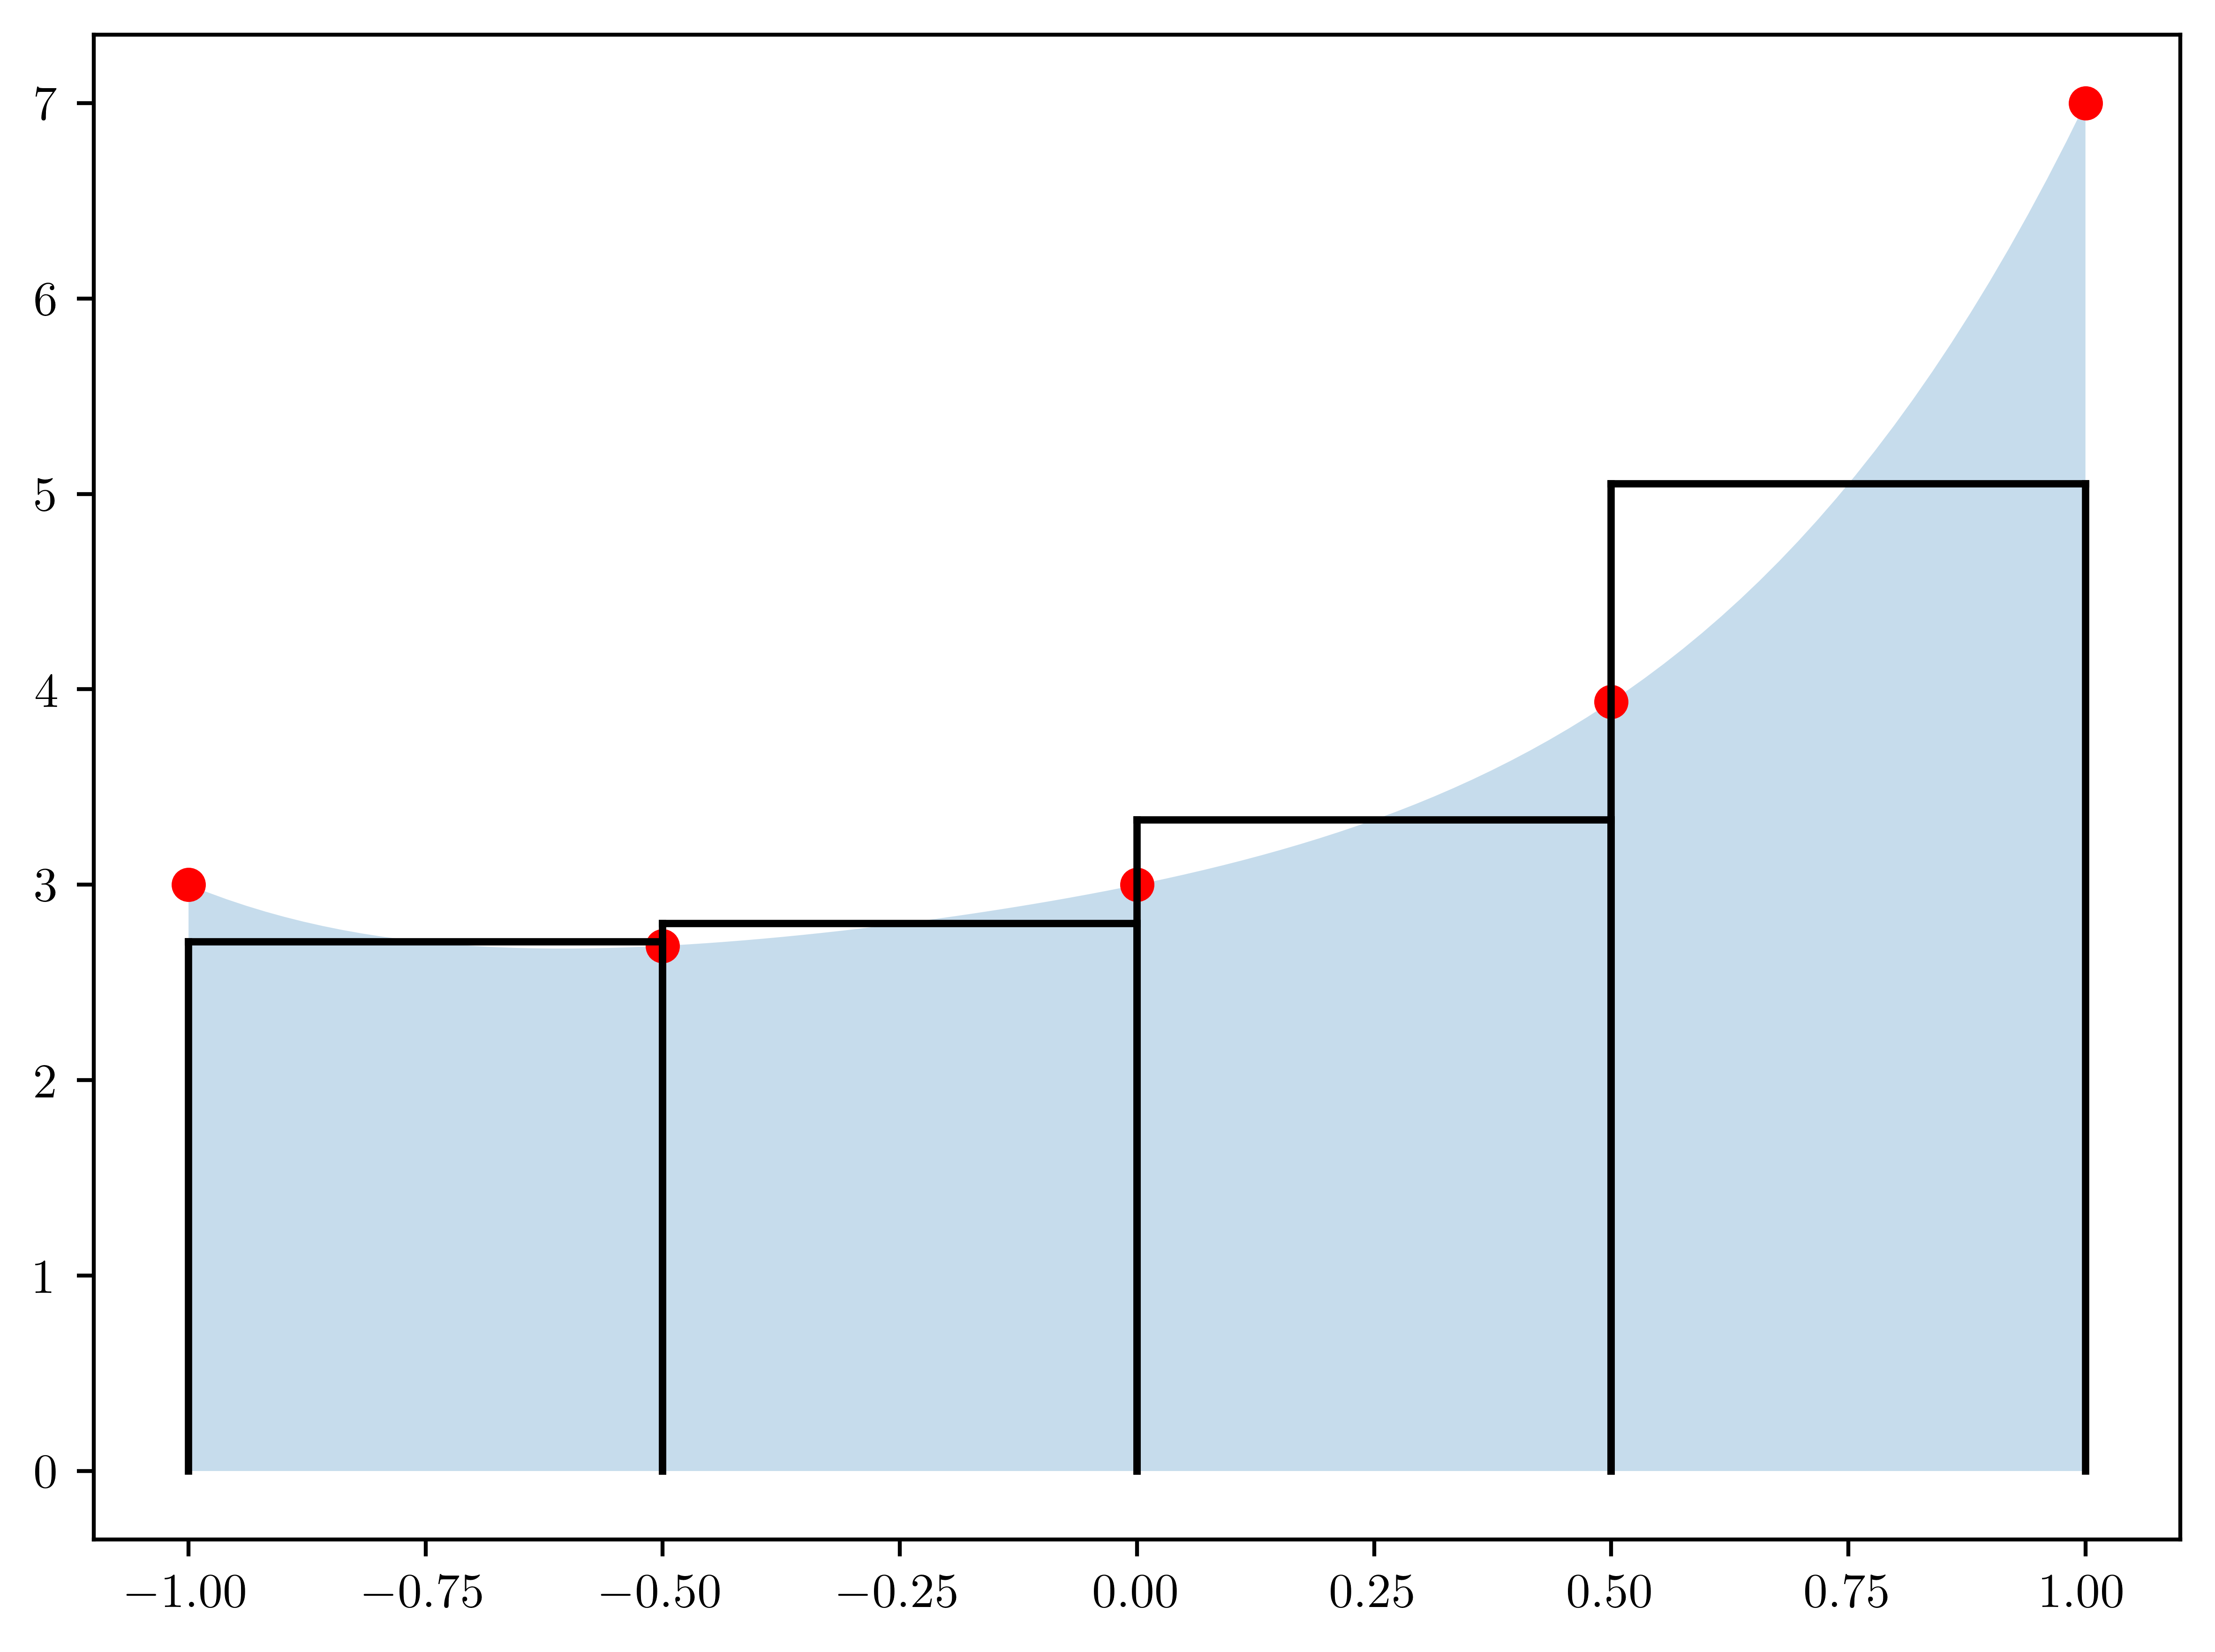

In [26]:
fig, ax = plt.subplots()

ax.fill_between(x, f(x), alpha=0.25)
ax.plot(X, f(X), "ro")

for n in range(len(X) - 1):
    f_mid = f(X[n : n + 2].mean())
    ax.plot([X[n], X[n]], [0, f_mid], "k")
    ax.plot([X[n + 1], X[n + 1]], [0, f_mid], "k")
    ax.plot(X[n : n + 2], [f_mid] * 2, "k")

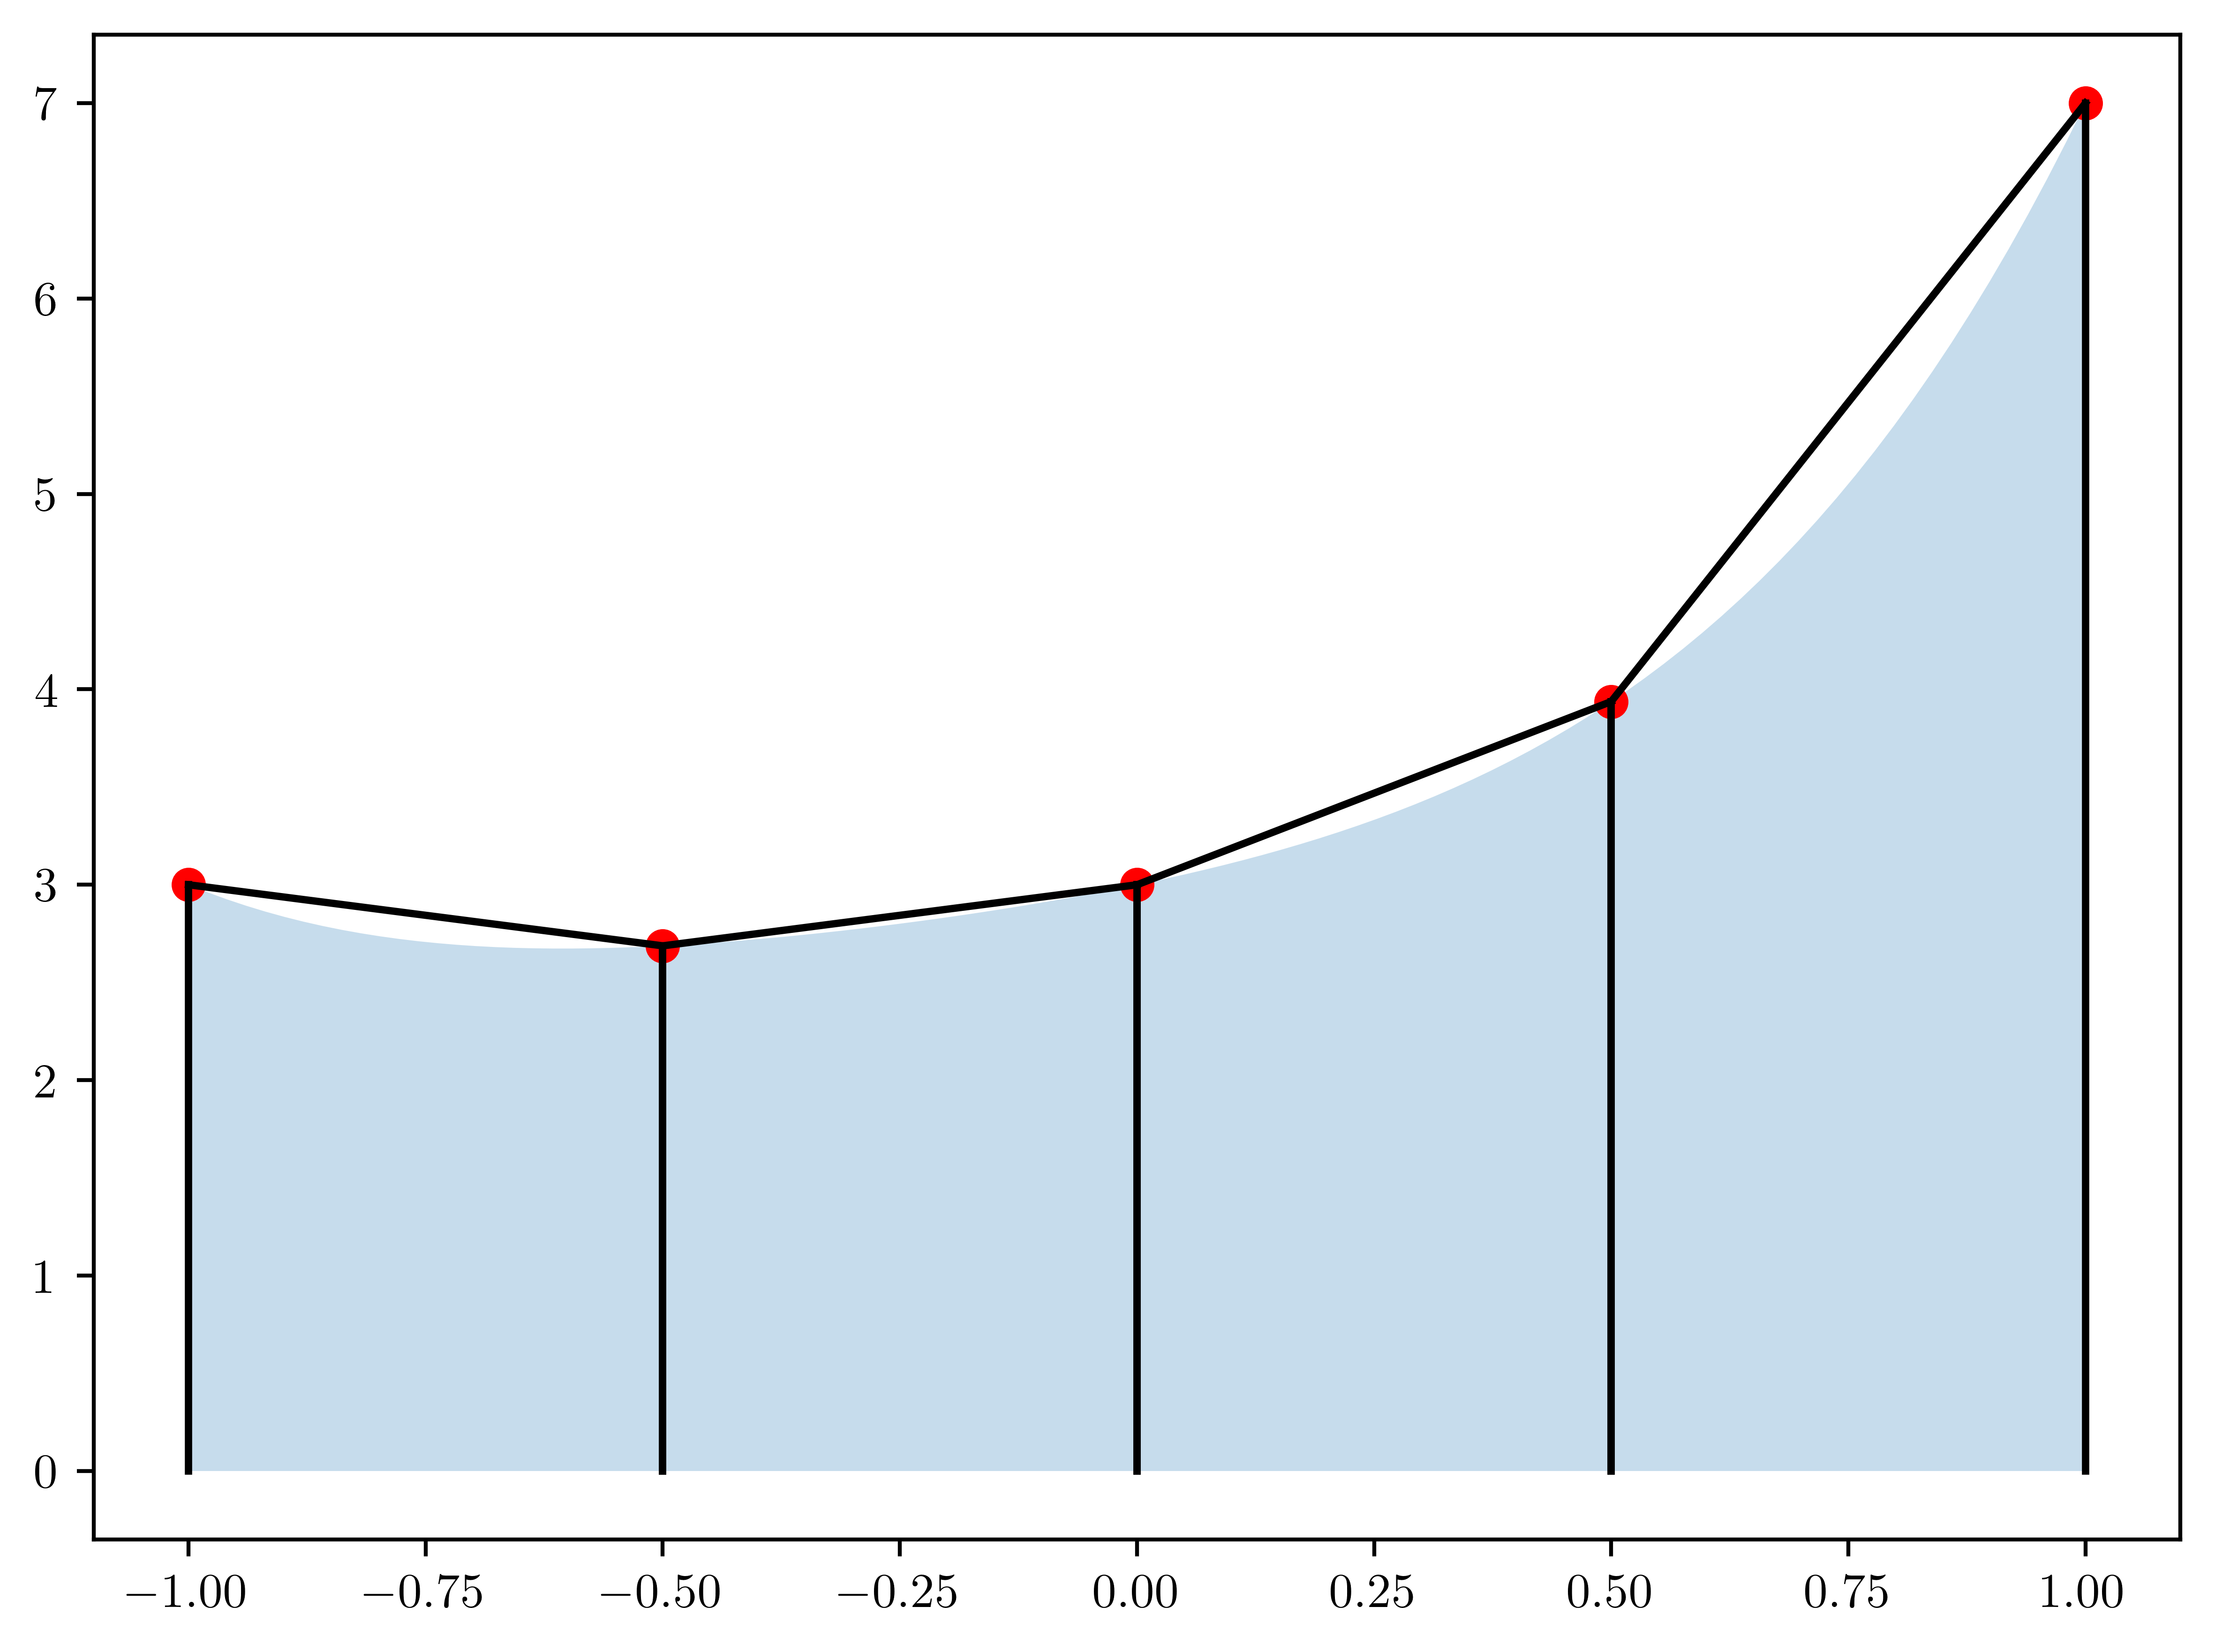

In [27]:
fig, ax = plt.subplots()

ax.fill_between(x, f(x), alpha=0.25)
ax.plot(X, f(X), "ro")

for n in range(len(X) - 1):
    f_mid = f(X[n : n + 2].mean())
    ax.plot([X[n], X[n]], [0, f(X[n])], "k")
    ax.plot([X[n + 1], X[n + 1]], [0, f(X[n + 1])], "k")
    ax.plot(X[n : n + 2], [f(X[n]), f(X[n + 1])], "k")